In [1]:
import pandas as pd
import re
import sys
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('Labelled Yelp Dataset.csv',encoding='latin1')
df.shape

(359052, 6)

In [3]:
df.head()

,User_id,Product_id,Rating,Date,Review,Label
0,923,0,3,12/8/2014,The food at snack is a selection of popular Gr...,-1
1,924,0,3,5/16/2013,This little place in Soho is wonderful. I had ...,-1
2,925,0,4,7/1/2013,ordered lunch for 15 from Snack last Friday. Ã...,-1
3,926,0,4,7/28/2011,This is a beautiful quaint little restaurant o...,-1
4,927,0,4,11/1/2010,Snack is great place for a ÃÂ casual sit down...,-1


In [4]:
df.sort_values('Date')

,User_id,Product_id,Rating,Date,Review,Label
123562,40148,671,3,1/1/2007,The food is usually good. It seems like this p...,1
247654,30337,906,4,1/1/2007,Yes.. the Roti Canai is THAT good. Its this sl...,1
247653,30334,906,5,1/1/2007,Don't know how to describe this other than say...,1
181022,30887,486,4,1/1/2007,this place is amazing for what it is and I agr...,1
274004,43325,889,5,1/1/2008,"OK, Tavern on Jane wouldn't rate 5 stars on an...",1
...,...,...,...,...,...,...
33694,27028,85,5,9/9/2014,Vegetarian/vegan but on the filling side - MOB...,1
232961,120486,367,5,9/9/2014,Amazing chicken schwarma. Good spot for health...,1
105862,9434,296,4,9/9/2014,"Quintessential Village. No tourists, only real...",1
122594,74621,358,3,9/9/2014,"Came around lunch time during a week day, supe...",1


## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359052 entries, 0 to 359051
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   User_id     359052 non-null  int64 
 1   Product_id  359052 non-null  int64 
 2   Rating      359052 non-null  int64 
 3   Date        359052 non-null  object
 4   Review      359052 non-null  object
 5   Label       359052 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.4+ MB


In [6]:
statistics_of_data = []
for col in df[['User_id','Product_id','Rating','Date','Label']]:
    statistics_of_data.append((col,
                             len(df[col]),
                             100-df[col].isnull().sum()*100/df.shape[0],
                             df[col].nunique(),
                             df[col].value_counts().idxmax()
                             ))
stats_df = pd.DataFrame(statistics_of_data, columns=['Column Name', '# of Records', '% populated', 'Unique Values', 'Most Common Field Value'])
stats_df

,Column Name,# of Records,% populated,Unique Values,Most Common Field Value
0,User_id,359052,100.0,160225,3504
1,Product_id,359052,100.0,923,247
2,Rating,359052,100.0,5,5
3,Date,359052,100.0,3417,1/5/2015
4,Label,359052,100.0,2,1


In [7]:
### for reviews text
statistics_of_data = []
for col in df[['Review']]:
    statistics_of_data.append((col,
                             len(df[col]),
                             100-df[col].isnull().sum()*100/df.shape[0],
                             df[col].nunique()
                             ))
stats_df = pd.DataFrame(statistics_of_data, columns=['Column Name', '# of Records', '% populated', 'Unique Values'])
stats_df

,Column Name,# of Records,% populated,Unique Values
0,Review,359052,100.0,358156


In [8]:
#### We can see that these data is 100% populated and we do not need to deal with missing values

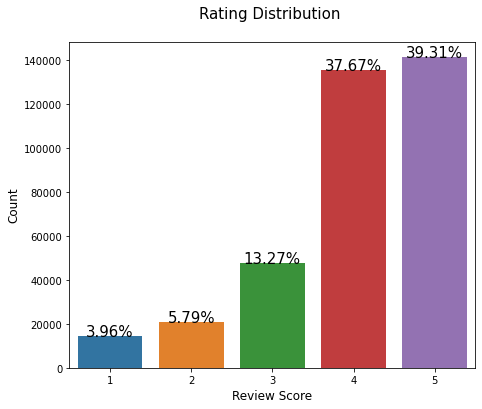

In [9]:
plt.figure(figsize=(16,6))
plt.subplot(121)
g = sns.countplot(x='Rating', data=df)
total = len(df)
g.set_title("Rating Distribution \n", fontsize=15)
g.set_xlabel("Review Score", fontsize=12)
g.set_ylabel('Count', fontsize=12)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
plt.show()

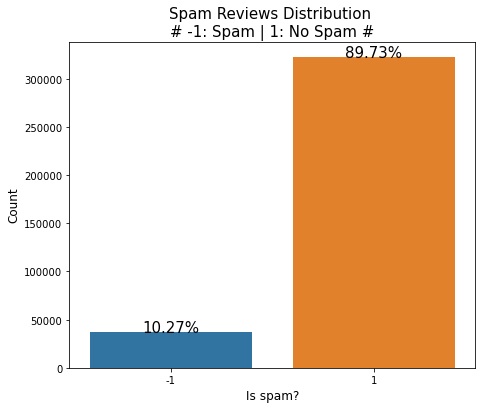

In [10]:
plt.figure(figsize=(16,6))
plt.subplot(121)
g = sns.countplot(x='Label', data=df)
total = len(df)
g.set_title("Spam Reviews Distribution \n# -1: Spam | 1: No Spam #", fontsize=15)
g.set_xlabel("Is spam?", fontsize=12)
g.set_ylabel('Count', fontsize=12)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
plt.show()

In [11]:
g.patches

In [12]:
df['Date'] = pd.to_datetime(df.Date)

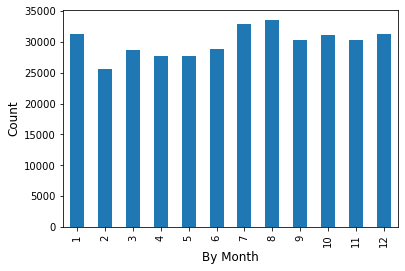

<Figure size 1440x720 with 0 Axes>

In [13]:
#By month
df2 = df['Date'].groupby(df.Date.dt.month).agg('count')
g = df2.plot(kind='bar')
g.set_xlabel("By Month", fontsize=12)
g.set_ylabel('Count', fontsize=12)
plt.figure(figsize=(20,10))
plt.show()

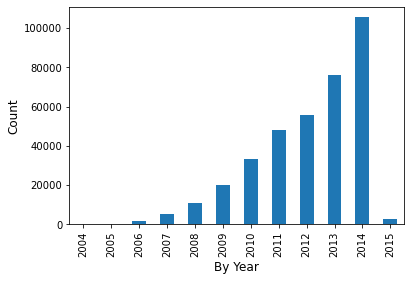

<Figure size 1440x720 with 0 Axes>

In [14]:
#By year
df2 = df['Date'].groupby(df.Date.dt.year).agg('count')
g = df2.plot(kind='bar')
g.set_xlabel("By Year", fontsize=12)
g.set_ylabel('Count', fontsize=12)
plt.figure(figsize=(20,10))
plt.show()

## Resample data

In [15]:
df['Label'].value_counts()

 1    322167
-1     36885
Name: Label, dtype: int64

In [16]:
from sklearn.utils import resample
df_ham = df[df['Label'] == 1]
df_spam = df[df['Label'] == -1]
df_ham_sample = df_ham.sample(36885)
df_undersampled = pd.concat([df_ham_sample, df_spam])
df_undersampled

,User_id,Product_id,Rating,Date,Review,Label
160157,90899,454,4,2014-02-11,"I'm from LA and did not know the area, so at 3...",1
43603,4661,100,4,2011-02-27,Thursday morning started early with me in the ...,1
201732,108017,542,4,2014-06-24,Delicious and great service. Is there really a...,1
323724,21984,757,2,2010-01-24,I must reluctantly offer only two stars to Le ...,1
343900,7891,726,4,2011-04-10,A friend that was visiting NYC for the week re...,1
...,...,...,...,...,...,...
358783,161046,921,5,2011-12-01,Bijan is the best bar I have been to in Brookl...,-1
358784,161047,921,5,2011-11-15,Great local lounge spot! After work and regula...,-1
358944,161111,349,1,2014-03-25,First and last time we try this place. ÃÂ Piz...,-1
358945,161112,349,3,2014-04-09,"The staff was incredibly nice, the lemonade ta...",-1


## Remove Stopwords and Regex and Lemmentazation

In [17]:
from textacy.preprocessing.replace import urls, hashtags, numbers, emails, emojis, currency_symbols
from textacy.preprocessing.normalize import quotation_marks, bullet_points
from textacy.preprocessing.remove import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter

In [18]:
df_undersampled['Review'] = df_undersampled['Review'].str.lower()

In [19]:
# remove all urls, hashtags,numbers,currency_symbols, emojis, emails and punctuation
df_undersampled["Review_cleaned"] = df_undersampled['Review'].\
  apply(urls).\
  apply(hashtags).\
  apply(numbers).\
  apply(currency_symbols).\
  apply(emojis).\
  apply(emails).\
  apply(punctuation)

In [20]:
# remove stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))
df_undersampled['Review_no_stopwords'] = df_undersampled['Review_cleaned'].apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word not in (stopwords)]))

In [21]:
#Apply word lemmentazation 
#refer from course slides notes
lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [22]:
df_undersampled['Review_Lemma'] = df_undersampled['Review_no_stopwords'].apply(lemmatize_sentence)

## Spam/No Spam Classification

In [23]:
# label as 0 or 1: 1 stands spam,0 stans for nonspam
df_undersampled['Label'] = np.where(df_undersampled['Label'] == -1,1,0)
df_undersampled

,User_id,Product_id,Rating,Date,Review,Label,Review_cleaned,Review_no_stopwords,Review_Lemma
160157,90899,454,4,2014-02-11,"i'm from la and did not know the area, so at 3...",0,i m from la and did not know the area so at ...,la know area NUMBER NUMBER sunday morning wand...,la know area NUMBER NUMBER sunday morning wand...
43603,4661,100,4,2011-02-27,thursday morning started early with me in the ...,0,thursday morning started early with me in the ...,thursday morning started early les need midtow...,thursday morning start early le need midtown N...
201732,108017,542,4,2014-06-24,delicious and great service. is there really a...,0,delicious and great service is there really a...,delicious great service really anything else n...,delicious great service really anything else n...
323724,21984,757,2,2010-01-24,i must reluctantly offer only two stars to le ...,0,i must reluctantly offer only two stars to le ...,must reluctantly offer two stars le grainne ca...,must reluctantly offer two star le grainne caf...
343900,7891,726,4,2011-04-10,a friend that was visiting nyc for the week re...,0,a friend that was visiting nyc for the week re...,friend visiting nyc week remembered paprika us...,friend visit nyc week remember paprika use liv...
...,...,...,...,...,...,...,...,...,...
358783,161046,921,5,2011-12-01,bijan is the best bar i have been to in brookl...,1,bijan is the best bar i have been to in brookl...,bijan best bar brooklyn far joke something dow...,bijan best bar brooklyn far joke something dow...
358784,161047,921,5,2011-11-15,great local lounge spot! after work and regula...,1,great local lounge spot after work and regula...,great local lounge spot work regular nights gr...,great local lounge spot work regular night gre...
358944,161111,349,1,2014-03-25,first and last time we try this place. ãâ piz...,1,first and last time we try this place ãâ piz...,first last time try place ãâ pizza crust hard...,first last time try place ãâ pizza crust hard...
358945,161112,349,3,2014-04-09,"the staff was incredibly nice, the lemonade ta...",1,the staff was incredibly nice the lemonade ta...,staff incredibly nice lemonade tasty salads cr...,staff incredibly nice lemonade tasty salad cru...


In [24]:
df_undersampled['Review_Lemma'] = df_undersampled['Review_Lemma'].str.replace(r'[Ã£Â\WÃ¢]', ' ')
df_undersampled['Review_Lemma'] = df_undersampled['Review_Lemma'].str.replace(r'ã\Wâ', ' ')
df_undersampled.head(5)

<ipython-input-24-43597480594f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_undersampled['Review_Lemma'] = df_undersampled['Review_Lemma'].str.replace(r'[Ã£Â\WÃ¢]', ' ')
<ipython-input-24-43597480594f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_undersampled['Review_Lemma'] = df_undersampled['Review_Lemma'].str.replace(r'ã\Wâ', ' ')


,User_id,Product_id,Rating,Date,Review,Label,Review_cleaned,Review_no_stopwords,Review_Lemma
160157,90899,454,4,2014-02-11,"i'm from la and did not know the area, so at 3...",0,i m from la and did not know the area so at ...,la know area NUMBER NUMBER sunday morning wand...,la know area NUMBER NUMBER sunday morning wand...
43603,4661,100,4,2011-02-27,thursday morning started early with me in the ...,0,thursday morning started early with me in the ...,thursday morning started early les need midtow...,thursday morning start early le need midtown N...
201732,108017,542,4,2014-06-24,delicious and great service. is there really a...,0,delicious and great service is there really a...,delicious great service really anything else n...,delicious great service really anything else n...
323724,21984,757,2,2010-01-24,i must reluctantly offer only two stars to le ...,0,i must reluctantly offer only two stars to le ...,must reluctantly offer two stars le grainne ca...,must reluctantly offer two star le grainne caf...
343900,7891,726,4,2011-04-10,a friend that was visiting nyc for the week re...,0,a friend that was visiting nyc for the week re...,friend visiting nyc week remembered paprika us...,friend visit nyc week remember paprika use liv...


### Word Vectorizer

In [25]:
#split the dataset 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
# delete null values in Review_lemma  
df_undersampled['Review_Lemma'].isnull().sum()

0

In [27]:
df_undersampled = df_undersampled.dropna()
df_undersampled['Review_Lemma'].isnull().sum()

0

In [28]:
num_samples = 15000
spams = df_undersampled.loc[df_undersampled['Label'] == 1].iloc[:num_samples]
hams = df_undersampled.loc[df_undersampled['Label'] == 0].iloc[:num_samples]
docs = pd.concat([spams,hams])
docs.head()

,User_id,Product_id,Rating,Date,Review,Label,Review_cleaned,Review_no_stopwords,Review_Lemma
0,923,0,3,2014-12-08,the food at snack is a selection of popular gr...,1,the food at snack is a selection of popular gr...,food snack selection popular greek dishes appe...,food snack selection popular greek dish appeti...
1,924,0,3,2013-05-16,this little place in soho is wonderful. i had ...,1,this little place in soho is wonderful i had ...,little place soho wonderful lamb sandwich glas...,little place soho wonderful lamb sandwich glas...
2,925,0,4,2013-07-01,ordered lunch for 15 from snack last friday. ã...,1,ordered lunch for NUMBER from snack last fri...,ordered lunch NUMBER snack last friday ãâ tim...,order lunch NUMBER snack last friday time no...
3,926,0,4,2011-07-28,this is a beautiful quaint little restaurant o...,1,this is a beautiful quaint little restaurant o...,beautiful quaint little restaurant pretty stre...,beautiful quaint little restaurant pretty stre...
4,927,0,4,2010-11-01,snack is great place for a ãâ casual sit down...,1,snack is great place for a ãâ casual sit down...,snack great place ãâ casual sit lunch especia...,snack great place casual sit lunch especiall...


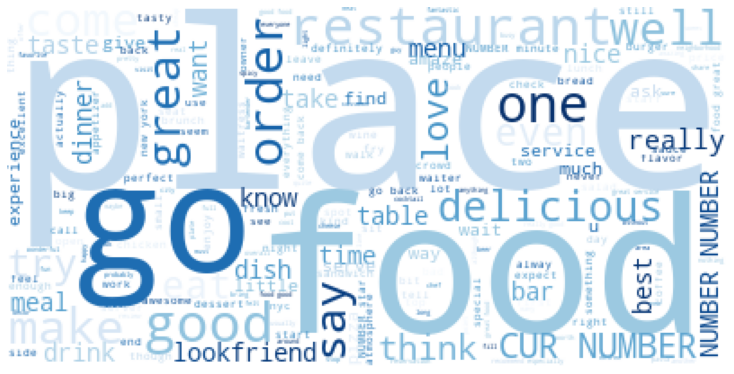

In [29]:
from wordcloud import WordCloud
list_spams = spams['Review_Lemma'].tolist()
new_spams = "".join(list_spams)
spam_wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Blues").generate(new_spams)
plt.figure( figsize=(10,8))
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
# Most common word in spams are place, restaurant,great,order,good, etc.

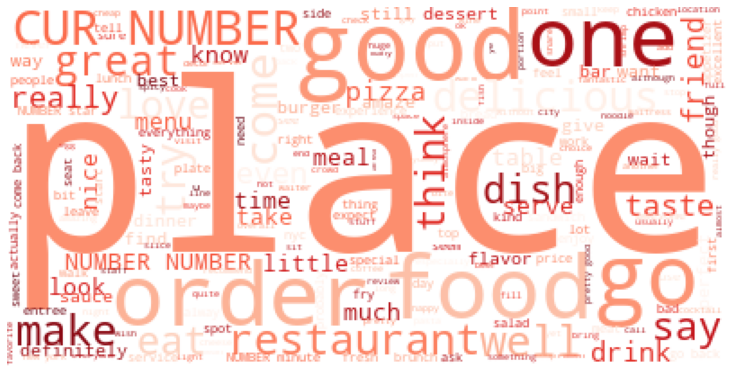

In [30]:
list_hams = hams['Review_Lemma'].tolist()
new_hams = "".join(list_hams)
ham_wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(new_hams)
plt.figure( figsize=(10,8))
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
#Most common word in hams are place, order good, etc. 

In [31]:
stopwords = ['place','food','go','one']
docs['Review_Lemma'] = docs['Review_Lemma'].apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word not in (stopwords)]))

In [32]:
vectorizer2 = TfidfVectorizer(stop_words = 'english',
                             ngram_range = (2,2),
                             #max_df = 2,
                             binary = True,
                             lowercase = True)
X2 = vectorizer2.fit_transform(docs['Review_Lemma'])
X2.shape

(30000, 625549)

In [33]:
X = X2
y = docs['Label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

## Classification Models

In [34]:
# Logistic regression,random forest, naive bayes, decision tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [35]:
mnb = MultinomialNB(alpha=0.5)
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=200, random_state=100,max_depth = 60)

In [36]:
models = {'Naive Bayes':mnb,'Logistic Regression':lrc,'Random Forest':rfc}

In [37]:
accuracy = {}
accuracy2 = {}
for key, values in models.items():
    model = values.fit(X_train,y_train)
    predicted = values.predict(X_test)
    accuracy.update({key:accuracy_score(y_test,predicted)})
    accuracy2.update({key:model.score(X_train,y_train)})
print(f'accuracy:{accuracy2}\n')
print(f'predicted accuracy:{accuracy}')

accuracy:{'Naive Bayes': 0.9937333333333334, 'Logistic Regression': 0.9739111111111111, 'Random Forest': 0.8265777777777777}

predicted accuracy:{'Naive Bayes': 0.6492, 'Logistic Regression': 0.6461333333333333, 'Random Forest': 0.6385333333333333}


## Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [40]:
y_predict = mnb.predict(X_test)
results = confusion_matrix(y_test,y_predict)
results = pd.DataFrame(results)

In [41]:
score = f1_score(y_test,y_predict)

In [42]:
score

0.6476496584973885

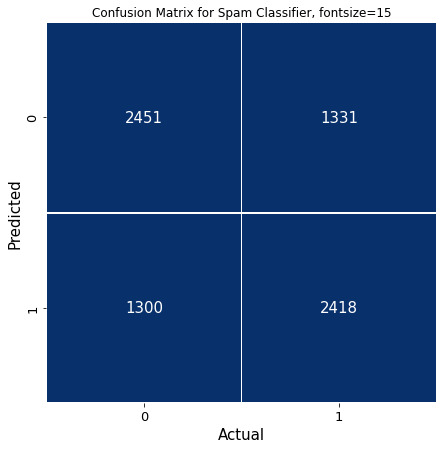

In [43]:
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(results.T, annot=True, annot_kws={"size": 15}, cmap="Blues", vmin=0, vmax=800, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["0","1"], yticklabels=["0","1"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["0","1"], fontsize=13)
ax.set_yticklabels(["0","1"], fontsize=13)
plt.title("Confusion Matrix for Spam Classifier, fontsize=15")
plt.show()